# 경사하강법 동작 이해

- 회귀모델에서는 대부분 손실함수로 MSE를 사용한다
- 모델이 파라미터 (가중치)를 업데이트 하는 (학습하는) 방법으로 경사하강법이 대부분 사용된다
- 경사하강법 (gradient Decent): 경사 (기울기, gradient)에 비례하여 가중치(weight, 계수)를 업데이트 하는 방식
- 손실함수 (Cost)를 줄여나가면서 최적의 가중치에 도닥하는 과정:

<img src ="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-07-19%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.15.08.png?raw=1" width=400 align="left">  

$Loss: L$ = ${1}\over{N}$ $\sum{e^{2}}$ = ${1}\over{N}$ $\sum(y_{i}-\hat{y_{i}})^{2}$  
$\hat{y_{i}}$ = $ax + b$

>  $y$ :  실제값, $\hat{y}$ :  예측치  
 
$\partial{L}\over{\partial{a}}$ $\propto$ $2e(-x)$  
$\partial{L}\over{\partial{b}}$ $\propto$ $2e(-1)$  

$ Gradient Descent: $   
> $ a_{i+1}$ = $ a_{i}$ - $\mu ex$  
> $ b_{i+1}$ = $ b_{i}$ - $\mu e$  

## 선형회귀 모델의 경사하강법 구현

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

- 아래과 같은 관계로 x, y, 랜덤 데이터를 만들로 이 데이터로부터 GD 알고리즘으로 최적의 계수를 찾는 과정
- y = 2x + 3 + 노이지

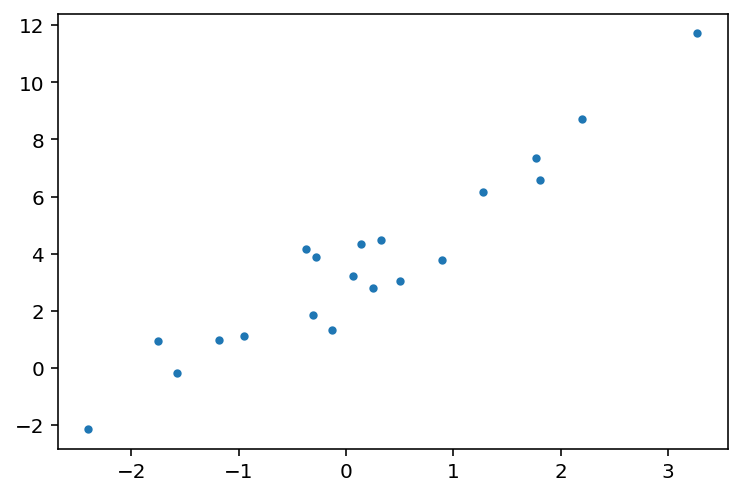

In [3]:
n_samples = 20
x = np.random.randn(n_samples)
w = 2
b = 3
# 노이지 추가
y = w*x + b  + 1.0* np.random.randn(n_samples)
plt.scatter(x,y, s=10)

## 내장된 모델을 사용하는 경우

In [4]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1) 모델 생성
leg.fit(x.reshape(-1,1), y) # (2) 학습

LinearRegression()

In [5]:
leg.coef_ , leg.intercept_

(array([2.18077408]), 3.310832993369508)

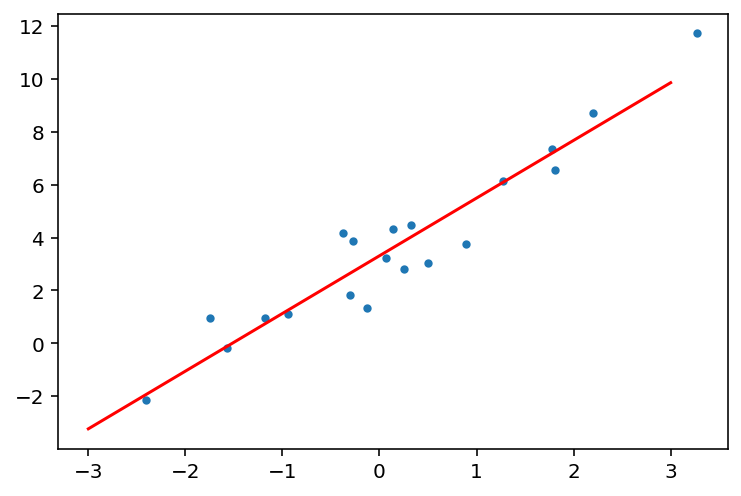

In [6]:
a, b = leg.coef_ , leg.intercept_
xs = np.linspace(-3,3,2)
ys = a*xs + b
plt.plot(xs,ys, c='r')
plt.scatter(x,y, s=10)

## 경사하강법 구현
- GD 알고리즘을 직접 구현하는 방법  
- $ Gradient Descent: $   
> $ a_{i+1}$ = $ a_{i}$ - $\mu ex$  
> $ b_{i+1}$ = $ b_{i}$ - $\mu e$  

In [30]:
num_epoch = 10 # 학습 반복 횟수
lr = 0.5 # learning rate
# 파라미터는 임의의 초기값에서 시작한다

w = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch): 
    y_pred = w*x + b
    e = y_pred - y
    print(f"{epoch:2} w = {w:.3f}, b = {b:.3f}, error(평균) = {np.abs(e).mean():.3f}")
    w = w - lr*(e*x).mean()
    b = b - lr*e.mean()

 0 w = 0.134, b = 0.519, error(평균) = 3.631
 1 w = 0.062, b = 2.151, error(평균) = 2.653
 2 w = -0.086, b = 2.973, error(평균) = 2.408
 3 w = -0.165, b = 3.397, error(평균) = 2.388
 4 w = -0.205, b = 3.617, error(평균) = 2.389
 5 w = -0.226, b = 3.730, error(평균) = 2.396
 6 w = -0.237, b = 3.788, error(평균) = 2.402
 7 w = -0.243, b = 3.819, error(평균) = 2.406
 8 w = -0.245, b = 3.834, error(평균) = 2.407
 9 w = -0.247, b = 3.842, error(평균) = 2.408


변수가 2개인 경우
--

In [23]:
n_samples = 20
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4  + 0.1*np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1.96745988 2.96369755]
4.014296164489189


경사하강법
--

In [29]:
num_epoch = 10
lr = 0.5

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = y_pred - y
    print(f"{epoch:2} w1 = {w1:.3f},  w2 = {w2:.3f}, b = {b:.3f} , error = {np.abs(error).mean():.3f}")

    w1 = w1 - lr*(error * x1).mean()
    w2 = w2 - lr*(error * x2).mean()
    b = b - lr*error.mean()

 0 w1 = 0.457,  w2 = 0.195, b = 0.150 , error = 3.902
 1 w1 = 0.461,  w2 = 1.480, b = 2.037 , error = 2.031
 2 w1 = 0.976,  w2 = 2.046, b = 2.891 , error = 1.220
 3 w1 = 1.353,  w2 = 2.379, b = 3.360 , error = 0.746
 4 w1 = 1.591,  w2 = 2.590, b = 3.631 , error = 0.460
 5 w1 = 1.737,  w2 = 2.725, b = 3.789 , error = 0.286
 6 w1 = 1.826,  w2 = 2.811, b = 3.882 , error = 0.182
 7 w1 = 1.881,  w2 = 2.867, b = 3.936 , error = 0.119
 8 w1 = 1.914,  w2 = 2.902, b = 3.968 , error = 0.090
 9 w1 = 1.935,  w2 = 2.924, b = 3.987 , error = 0.073
